In [1]:
import numpy as np

# 元データの作成
n=100
data_x = np.linspace(0, 4*np.pi, n)
data_y = 2*np.sin(data_x) + 3*np.cos(2*data_x) + 5*np.sin(2/3*data_x) + np.random.randn(len(data_x))

# 信号を欠損させて部分的なサンプル点を得る
missing_value_rate = 0.2
sample_index = np.sort(np.random.choice(np.arange(n), int(n*missing_value_rate), replace=False))

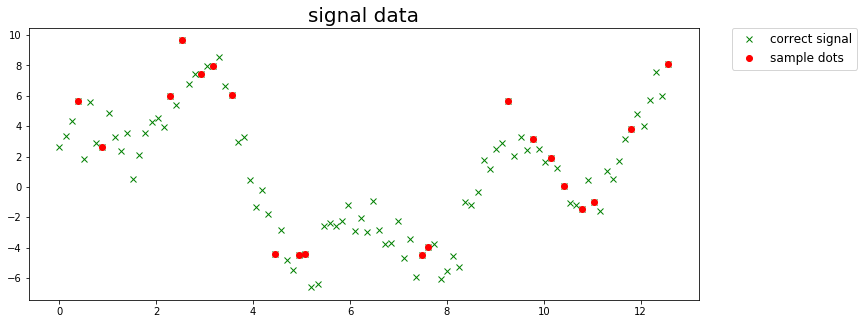

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 5))
plt.title('signal data', fontsize=20)

# 元の信号
plt.plot(data_x, data_y, 'x', color='green', label='correct signal')

# 部分的なサンプル点
plt.plot(data_x[sample_index], data_y[sample_index], 'o', color='red', label='sample dots')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
plt.show()

In [3]:
# ガウスカーネルを関数化
def kernel(x, x_prime, p, q, r):
    if x == x_prime:
        delta = 1
    else:
        delta = 0

    return p*np.exp(-1 * (x - x_prime)**2 / q) + ( r * delta)

In [4]:
# データの定義
xtrain = np.copy(data_x[sample_index])
ytrain = np.copy(data_y[sample_index])

xtest = np.copy(data_x)

In [5]:
# 平均
mu = []
# 分散
var = []

# 各パラメータ値
Theta_1 = 1.0
Theta_2 = 0.4
Theta_3 = 0.1

# 以下, ガウス過程回帰の計算の基本アルゴリズム
train_length = len(xtrain)
# トレーニングデータ同士のカーネル行列の下地を準備
K = np.zeros((train_length, train_length))

for x in range(train_length):
    for x_prime in range(train_length):
        K[x, x_prime] = kernel(xtrain[x], xtrain[x_prime], Theta_1, Theta_2, Theta_3)

# 内積はドットで計算
yy = np.dot(np.linalg.inv(K), ytrain)

test_length = len(xtest)
for x_test in range(test_length):

    # テストデータとトレーニングデータ間のカーネル行列の下地を準備
    k = np.zeros((train_length,))
    for x in range(train_length):
        k[x] = kernel(xtrain[x], xtest[x_test], Theta_1, Theta_2, Theta_3)

    s = kernel(xtest[x_test], xtest[x_test], Theta_1, Theta_2, Theta_3)

    # 内積はドットで計算して, 平均値の配列に追加
    mu.append(np.dot(k, yy))
    # 先に『k * K^-1』の部分を(内積なのでドットで)計算
    kK_ = np.dot(k, np.linalg.inv(K))
    # 後半部分との内積をドットで計算して, 分散の配列に追加
    var.append(s - np.dot(kK_, k.T))

C:\Users\mhomm\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


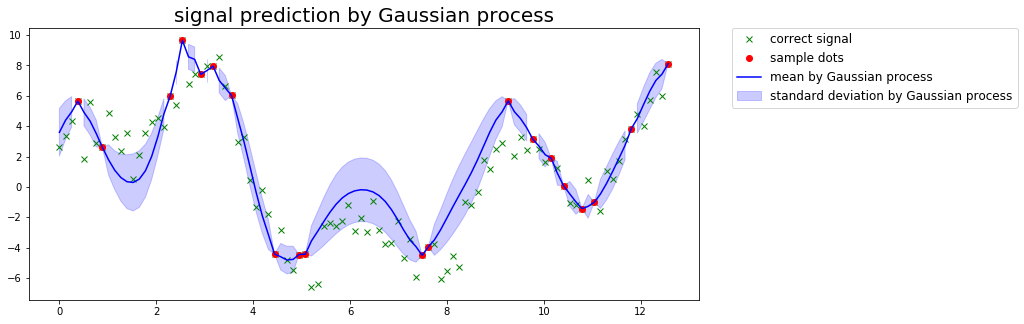

In [7]:
plt.figure(figsize=(12, 5))
plt.title('signal prediction by Gaussian process', fontsize=20)

# 元の信号
plt.plot(data_x, data_y, 'x', color='green', label='correct signal')
# 部分的なサンプル点
plt.plot(data_x[sample_index], data_y[sample_index], 'o', color='red', label='sample dots')

# 分散を標準偏差に変換
std = np.sqrt(var)

# ガウス過程で求めた平均値を信号化
plt.plot(xtest, mu, color='blue', label='mean by Gaussian process')
# ガウス過程で求めた標準偏差を範囲化 *範囲に関してはコード末を参照
plt.fill_between(xtest, mu + 2*std, mu - 2*std, alpha=.2, color='blue', label= 'standard deviation by Gaussian process')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
plt.show()

# 平均値±(標準偏差×2) … 95.4%の確率で範囲内に指定の数値が現れる